In [1]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

import pandas, seaborn, numpy, collections, numpy, pickle, scipy
from matplotlib import pyplot
pandas.set_option('display.max_columns', None)
import scipy, sys, sklearn
import sklearn.utils
import matplotlib

def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')

matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)
matplotlib.rc('text', usetex=False)
#reload(c)

%matplotlib inline
%config InlineBackend.figure_format = 'png'


/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
df = pandas.read_csv("../data/derived/main_signatures.csv", index_col=0).T
df

,Signature 1,Signature 2,Signature 3,Signature 4,Signature 5,Signature 6,Signature 7,Signature 8,Signature 9,Signature 10,Signature 11,Signature 12,Signature 13,Signature 14,Signature 15,Signature 16,Signature 17,Signature 18,Signature 19,Signature 20,Signature 21,Signature 22,Signature 23,Signature 24,Signature 25,Signature 26,Signature 27,Signature 28,Signature 29,Signature 30,Cisplatin: Gallus gallus,Cyclophosphamide: Gallus gallus,Etoposide: Gallus gallus,Cisplatin: C. Elegans
A[C>A]A,0.011098,6.827100e-04,0.022172,0.0365,0.014942,0.0017,0.0004,0.036718,0.0120,0.0007,0.0002,0.0077,3.347600e-04,0.0001,0.0013,0.0161,0.001832,5.053642e-02,0.0107,1.179960e-03,0.0001,0.001504,0.000453,0.028646,0.009897,2.039770e-03,0.005206,0.001397,0.069982,0.000000,0.005793,0.005456,0.014940,0.005393
A[C>A]C,0.009149,6.191100e-04,0.017872,0.0309,0.008961,0.0028,0.0005,0.033246,0.0067,0.0010,0.0010,0.0047,6.487400e-04,0.0042,0.0040,0.0097,0.000342,1.093982e-02,0.0074,2.211510e-03,0.0007,0.002451,0.000367,0.020215,0.006999,1.487160e-03,0.004738,0.000917,0.055152,0.000000,0.103328,0.006880,0.011079,0.009904
A[C>A]G,0.001490,9.928000e-05,0.002138,0.0183,0.002208,0.0005,0.0000,0.002525,0.0005,0.0003,0.0000,0.0017,3.814000e-05,0.0005,0.0000,0.0022,0.000002,2.288070e-03,0.0005,1.600000e-07,0.0000,0.000000,0.000000,0.020479,0.001448,2.839500e-04,0.000783,0.000000,0.017847,0.001967,0.000460,0.001063,0.004514,0.000914
A[C>A]T,0.006234,3.238900e-04,0.016265,0.0243,0.009207,0.0019,0.0004,0.033599,0.0068,0.0092,0.0002,0.0046,8.466600e-04,0.0296,0.0057,0.0088,0.003180,1.942409e-02,0.0074,3.008010e-03,0.0006,0.000922,0.000000,0.024600,0.004967,5.978700e-04,0.002718,0.000513,0.026805,0.000000,0.023322,0.008658,0.007311,0.007491
A[C>G]A,0.001801,2.634800e-04,0.024003,0.0097,0.011671,0.0013,0.0000,0.008357,0.0048,0.0005,0.0007,0.0031,3.775170e-03,0.0001,0.0011,0.0048,0.001662,1.516890e-03,0.0058,6.970400e-04,0.0005,0.000528,0.000000,0.011993,0.008033,1.272880e-03,0.001324,0.000255,0.009302,0.000000,0.002787,0.003045,0.019554,0.004086
A[C>G]C,0.002581,2.698700e-04,0.012160,0.0054,0.007292,0.0012,0.0000,0.004306,0.0023,0.0003,0.0003,0.0015,9.208200e-04,0.0000,0.0001,0.0024,0.001627,2.498780e-03,0.0019,2.059310e-03,0.0008,0.000000,0.000000,0.008425,0.001636,1.528190e-03,0.001771,0.000269,0.003479,0.000000,0.002303,0.002265,0.004189,0.003183
A[C>G]G,0.000593,2.192300e-04,0.005275,0.0031,0.002304,0.0000,0.0000,0.000584,0.0000,0.0000,0.0000,0.0000,1.989000e-05,0.0000,0.0006,0.0000,0.000026,2.614510e-03,0.0000,1.273000e-05,0.0000,0.000000,0.000000,0.000000,0.000000,3.072500e-04,0.000000,0.000000,0.000154,0.004820,0.000316,0.001071,0.004916,0.000673
A[C>G]T,0.002964,6.109700e-04,0.023278,0.0054,0.011696,0.0018,0.0001,0.008635,0.0038,0.0002,0.0009,0.0025,3.860630e-03,0.0001,0.0010,0.0073,0.001329,3.983010e-03,0.0072,8.485900e-04,0.0018,0.000299,0.000000,0.003881,0.003428,2.498250e-03,0.001323,0.000308,0.003977,0.000000,0.003911,0.003682,0.010142,0.004896
A[C>T]A,0.029515,7.441560e-03,0.017872,0.0120,0.021839,0.0312,0.0000,0.018067,0.0093,0.0000,0.0225,0.0121,1.480180e-03,0.0293,0.0117,0.0135,0.009350,3.825620e-03,0.0221,3.285805e-02,0.0051,0.003113,0.019767,0.006316,0.020988,5.907230e-03,0.013723,0.005434,0.005197,0.065119,0.001760,0.010673,0.007054,0.002629
A[C>T]C,0.014323,2.726310e-03,0.008896,0.0075,0.012756,0.0163,0.0197,0.005650,0.0056,0.0032,0.1099,0.0054,4.051000e-05,0.0321,0.0169,0.0076,0.004224,2.465210e-03,0.0203,2.219605e-02,0.0062,0.001525,0.081881,0.003844,0.013141,1.062646e-02,0.005424,0.001815,0.008976,0.054397,0.005817,0.026365,0.018028,0.005128


In [3]:
signatures_to_plot = [x for x in df.columns if 'Signature' not in x]
signatures_to_plot

['Cisplatin: Gallus gallus',
 'Cyclophosphamide: Gallus gallus',
 'Etoposide: Gallus gallus',
 'Cisplatin: C. Elegans']

Wrote: ../figures/extracted_signatures_chicken.pdf
Wrote: ../figures/extracted_signatures_worm.pdf


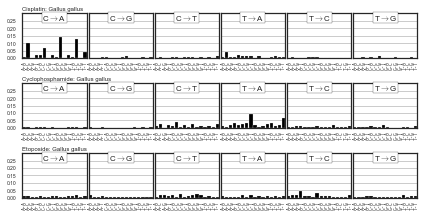

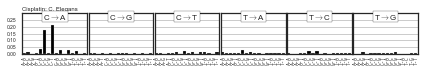

In [6]:
for (filename, figure_signatures) in [
        ("extracted_signatures_chicken", [x for x in signatures_to_plot if 'gallus' in x.lower()]),
        ("extracted_signatures_worm", [x for x in signatures_to_plot if 'elegans' in x.lower()])]:
    
    seaborn.set_context('paper')
    seaborn.set_style("white")
    pyplot.figure(figsize=(6,1.0 * len(figure_signatures)))

    grid = (len(figure_signatures), 6)

    prev_axes = []

    for (row, signature) in enumerate(figure_signatures):
        for (col, kind) in enumerate(sorted(set(df.index.str.slice(2,5)))):
            sharex = sharey = None
            if col > 1:
                sharey = prev_axes[-1]
            if row != 0:
                sharex = prev_axes[-grid[1]]

            ax = pyplot.subplot2grid(grid, (row, col), sharex=sharex, sharey=sharey)
            if col == 0:
                pyplot.text(0, 0.32, signature, fontsize=6)

            prev_axes.append(ax)

            sub_df = df[df.index.str.contains(kind)].copy()
            sub_df["mutation"] = sub_df.index

            pyplot.bar(numpy.arange(sub_df.shape[0]),
                       sub_df[signature].values,
                       color='black')

            ax.tick_params(axis='x', which='major', pad=2)
            pyplot.xticks(
                numpy.arange(sub_df.shape[0]) + 0.5, [x.replace("[%s]" % kind, "-") for x in sub_df.index],
                fontsize=5,
                family='monospace',
            )
            pyplot.xticks(rotation=90)
            pyplot.ylabel("")
            pyplot.xlabel("")
            ax.text(0.5,.85,
                kind.replace(">", "$\\rightarrow$"),
                bbox=dict(facecolor='white', edgecolor='black', pad=1),
                fontsize=8,
                horizontalalignment='center',
                transform=ax.transAxes)
            pyplot.ylim(ymin=0, ymax=0.3)
            ax.yaxis.grid('on', linewidth=1)

            #ax.label_outer()
            pyplot.yticks([0.0, 0.05, 0.1, 0.15, 0.20, 0.25], fontsize=5)
            for label in ax.get_yticklabels():
                label.set_visible(ax.is_first_col())

    pyplot.tight_layout(w_pad=0, h_pad=1.5)

    output = "../figures/%s.pdf" % filename
    pyplot.savefig(output)
    print("Wrote: %s" % output)